In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib


In [ ]:

df = pd.read_csv("DSL-StrongPasswordData.csv")  

df.head()


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:

print("Missing values:\n", df.isnull().sum())


df = df.dropna()


df = df.drop(columns=["sessionIndex", "rep"])


X = df.drop(columns=["subject"])  
y = df["subject"]  


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)



Missing values:
 subject            0
sessionIndex       0
rep                0
H.period           0
DD.period.t        0
UD.period.t        0
H.t                0
DD.t.i             0
UD.t.i             0
H.i                0
DD.i.e             0
UD.i.e             0
H.e                0
DD.e.five          0
UD.e.five          0
H.five             0
DD.five.Shift.r    0
UD.five.Shift.r    0
H.Shift.r          0
DD.Shift.r.o       0
UD.Shift.r.o       0
H.o                0
DD.o.a             0
UD.o.a             0
H.a                0
DD.a.n             0
UD.a.n             0
H.n                0
DD.n.l             0
UD.n.l             0
H.l                0
DD.l.Return        0
UD.l.Return        0
H.Return           0
dtype: int64


In [ ]:
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")


c:\Users\tharu\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:05:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 93.48%
XGBoost Accuracy: 93.21%


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81        80
           1       0.94      0.91      0.92        80
           2       0.88      0.86      0.87        80
           3       0.95      0.95      0.95        80
           4       0.90      0.86      0.88        80
           5       0.86      0.88      0.87        80
           6       1.00      0.99      0.99        80
           7       1.00      0.79      0.88        80
           8       0.87      0.95      0.91        80
           9       0.96      0.96      0.96        80
          10       0.96      0.93      0.94        80
          11       0.91      0.97      0.94        80
          12       0.99      0.99      0.99        80
          13       0.99      0.82      0.90        80
          14       0.99      0.99      0.99        80
          15       0.96      0.84      0.89        80
          16       0.85      0.97      0.91

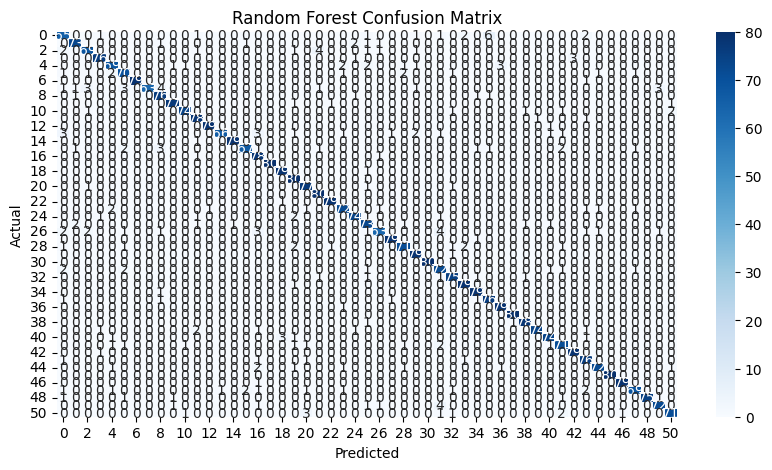

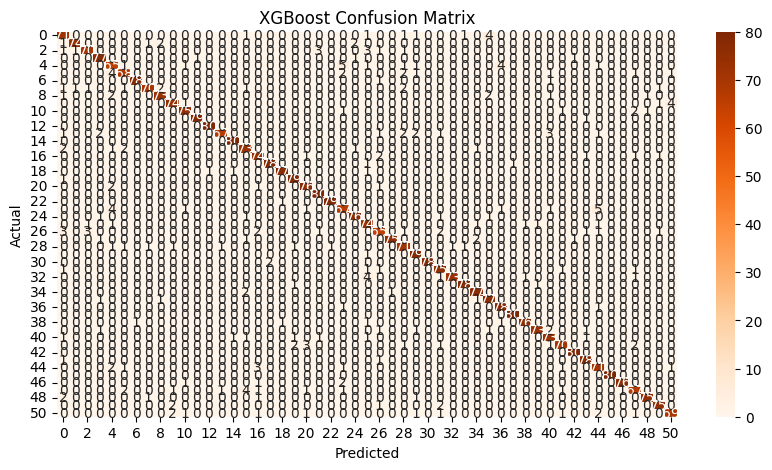

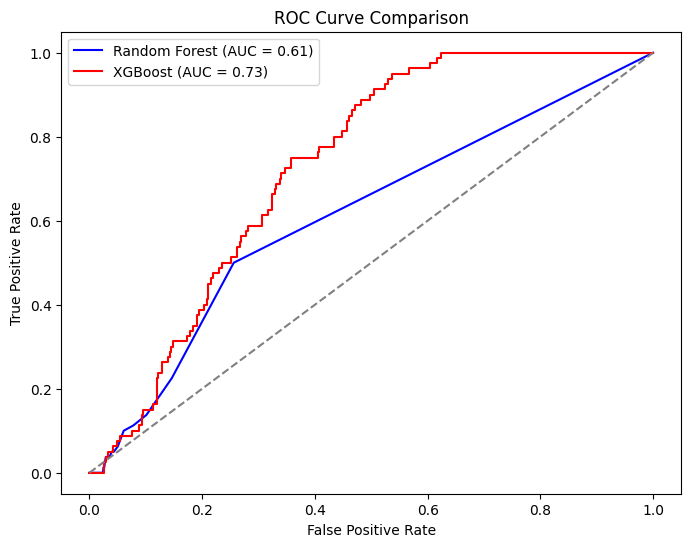

In [12]:
# Classification Report
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

# Confusion Matrices
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for Random Forest
y_test_bin = np.where(y_test == np.unique(y_test)[0], 1, 0)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve for XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves Together
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color="blue", label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, color="red", label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [13]:
# Save the best model based on accuracy
best_model = rf_model if rf_accuracy > xgb_accuracy else xgb_model

# Save the trained model
joblib.dump(best_model, "keystroke_auth_model.pkl")

# Save the scaler (for normalizing new data during authentication)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
